In [1]:
'''
Load packages for working with data
'''
import numpy as np
import pandas as pd


'''
Load packages for plotting graphs
'''
import matplotlib.pyplot as plt
import seaborn as sns


'''
Load packages for model deployment and evaluation
'''
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, \
                                          QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model as skl_lm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, \
                                    KFold, \
                                    cross_val_score
from sklearn.metrics import auc, \
                            confusion_matrix, \
                            classification_report, \
                            roc_curve, \
                            roc_auc_score, \
                            precision_recall_curve, \
                            average_precision_score, \
                            accuracy_score, \
                            balanced_accuracy_score, \
                            precision_score, \
                            recall_score


'''
Suppress warnings
'''
import warnings
warnings.filterwarnings('ignore')


'''
Load Standart Scalar for standardization
'''
from sklearn.preprocessing import StandardScaler


In [2]:
'''
Load data with appropriate column names
'''

german_credit = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", \
                 delimiter=' ', header=None)

german_credit.columns = ["chk_acct", "duration", "credit_his", "purpose", 
                            "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", 
                            "present_resid", "property", "age", "other_install", "housing", "n_credits", 
                            "job", "n_people", "telephone", "foreign", "response"]

german_credit.response = german_credit.response - 1

In [3]:
'''
dummification
'''
german_credit_dummies = pd.get_dummies(german_credit, drop_first = True)

In [4]:
'''
Separate features and label from the original german dataset
'''
X = german_credit_dummies.drop(columns=['response'])
y = german_credit_dummies['response']
# y = y.values - 1

In [5]:
print('The number of observation is:    {}'.format(len(y)))
print('The number of positive class is: {}'.format(sum(y)))
print('The number of negative class is: {}'.format(sum(y == 0)))

The number of observation is:    1000
The number of positive class is: 300
The number of negative class is: 700


In [6]:
'''
train and test datasets
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [7]:
print('The number of observation in training set is:    {}'.format(len(y_train)))
print('The number of positive class in training set is: {}'.format(sum(y_train)))
print('The number of negative class in training set is: {}'.format(sum(y_train == 0)))

The number of observation in training set is:    800
The number of positive class in training set is: 241
The number of negative class in training set is: 559


In [8]:
def roc_curve_plot(fpr, tpr):
    '''
    Plot ROC rurve
    
    Parameters: 
    fpr: float
    tpr: float
  
    Returns: 
    plot: ROC curve graph
    '''
    
    
    x = np.linspace(0,1,100)
    
    plt.figure(figsize = (10,6))
    
    plt.plot(fpr, tpr) 
    
    plt.plot(x,x,".", markersize = 1.6) 
    
    plt.title("ROC Curve")
    
    plt.xlabel("FPR")
    
    plt.ylabel("TPR")
    
    plt.show()

## 1. Apply LDA on the training set. Draw the ROC curve and calculate the AUC

In [9]:
# sc = StandardScaler() 
# X_train = sc.fit_transform(X_train)  
# X_test = sc.transform(X_test)  

In [10]:
'''
Create the model and fit on training dataset
'''
lda = LinearDiscriminantAnalysis(tol = 0.0000001).fit(X_train,y_train)

In [11]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred = lda.predict(X_test)
pred_prob = lda.predict_proba(X_test)

In [12]:
'''
Obtain confusion_matrix 
'''
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

126 15 24 35


In [13]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = pred_prob[:,1], pos_label = 1)
auc_lda = auc(fpr,tpr)
print(auc_lda)

0.8106743598990264


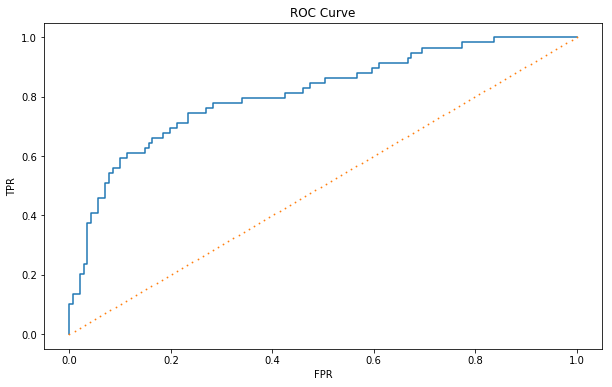

In [14]:
roc_curve_plot(fpr=fpr, tpr=tpr)

## 2. Apply QDA on the training set. Draw the ROC curve and calculate the AUC.

In [15]:
'''
Create the model and fit on training dataset
'''
qda = QuadraticDiscriminantAnalysis(tol = 0.0000001).fit(X_train,y_train)

In [16]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred = qda.predict(X_test)
pred_prob = qda.predict_proba(X_test)

In [17]:
'''
Obtain confusion_matrix 
'''
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

111 30 20 39


In [18]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = pred_prob[:,1], pos_label = 1)
auc_qda = auc(fpr,tpr)
print(auc_qda)

0.7652362062747926


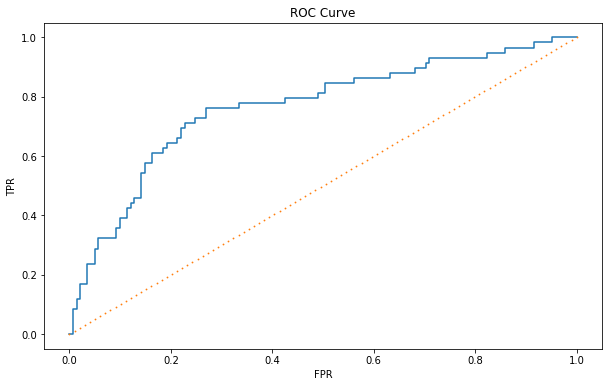

In [19]:
roc_curve_plot(fpr=fpr, tpr=tpr)

## 3. Apply Naïve Bayes on the training set. Draw the ROC curve and calculate the AUC 

In [20]:
'''
Create the model and fit on training dataset
'''
gnb = GaussianNB().fit(X_train,y_train)

In [21]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred = gnb.predict(X_test)
pred_prob = gnb.predict_proba(X_test)

In [22]:
'''
Obtain confusion_matrix 
'''
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

107 34 23 36


In [23]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = pred_prob[:,1], pos_label = 1)
auc_gnb = auc(fpr,tpr)
print(auc_gnb)

0.7621108306286813


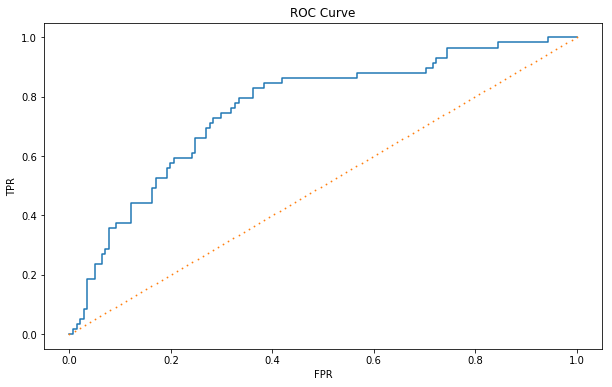

In [24]:
roc_curve_plot(fpr=fpr, tpr=tpr)

## 4. Apply Logistic Regression on the training set. Draw the ROC curve and calculate the AUC

In [25]:
'''
Create the model and fit on training dataset
'''
lr = skl_lm.LogisticRegression(max_iter=1000,tol=0.000001).fit(X_train,y_train)

In [26]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred = lr.predict(X_test)
pred_prob = lr.predict_proba(X_test)

In [27]:
'''
Obtain confusion_matrix 
'''
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

128 13 27 32


In [28]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = pred_prob[:,1], pos_label = 1)
auc_lr = auc(fpr,tpr)
print(auc_lr)

0.8188484192811637


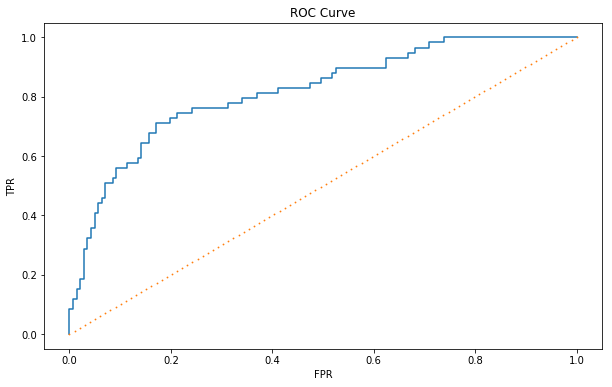

In [29]:
roc_curve_plot(fpr=fpr, tpr=tpr)

## Apply k-NN on the training set and by 10-fold cross validation find the optimal value of the parameter k. For the optimal model draw the ROC curve and calculate the AUC 

In [30]:
'''
Find the optimal value of the parameter k for knn
'''
K = np.arange(1,25)

scores = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    kfold = KFold(n_splits=10)
    
    score = cross_val_score(knn, X_train, y_train, cv = kfold, scoring = "accuracy")
    
    scores.append(score)

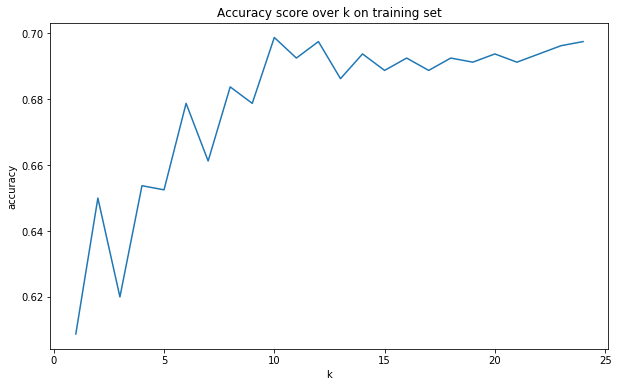

In [31]:
'''
Plot accuracy over various k to find the optimal one.
'''
plt.figure(figsize = (10,6))

plt.plot(K, np.mean(np.array(scores), axis = 1))

plt.title('Accuracy score over k on training set')

plt.xlabel('k')

plt.ylabel('accuracy')

plt.show()

In [32]:
'''
Fit the best model
'''
optimal_k = np.argmax(np.mean(scores, axis=1)) + 1

optimal_knn = KNeighborsClassifier(n_neighbors = optimal_k)
optimal_knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [33]:
'''
Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred = optimal_knn.predict(X_test)
pred_prob = optimal_knn.predict_proba(X_test)

In [34]:
'''
Obtain confusion_matrix 
'''
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

130 11 52 7


In [35]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = pred_prob[:,1], pos_label = 1)
auc_knn = auc(fpr,tpr)
print(auc_knn)

0.562206996033177


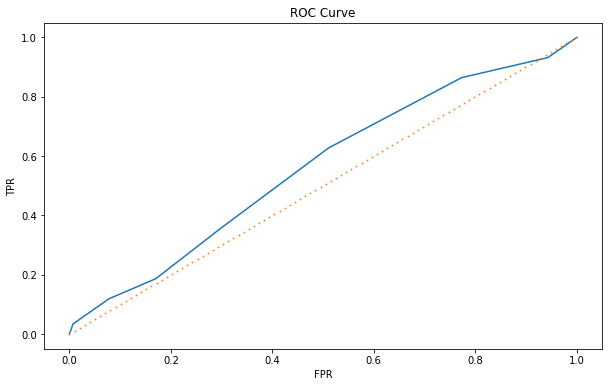

In [36]:
roc_curve_plot(fpr=fpr, tpr=tpr)

## Compare AUC measures of different models. Find the best model.

In [37]:
'''
Print the all obtained auc's
'''
print('auc of lda model is: {}'.format(auc_lda))
print('auc of qda model is: {}'.format(auc_qda))
print('auc of gnb model is: {}'.format(auc_gnb))
print('auc of lr  model is: {}'.format(auc_lr))
print('auc of knn model is: {}'.format(auc_knn))

auc of lda model is: 0.8106743598990264
auc of qda model is: 0.7652362062747926
auc of gnb model is: 0.7621108306286813
auc of lr  model is: 0.8188484192811637
auc of knn model is: 0.562206996033177


## For the best model calculate the test Accuracy, Balanced Accuracy, Sensitivity and Precision of the positive class

In [38]:
'''
As we can see from the above printed auc values , the best model is logistic regression, so I will calculate appropriate metrics for that model

Measures wich will be used on confusion matrix and roc-curve calculation
'''
pred = lr.predict(X_test)
pred_prob = lr.predict_proba(X_test)

In [39]:
'''
Obtain confusion_matrix 
'''
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred, labels = np.array([0,1])).ravel()

In [40]:
'''
False positive rate and True positive rate for positive class
'''
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = pred_prob[:,1], pos_label = 1)

In [41]:
'''
Classification report on test values
'''

print(classification_report(y_test, pred, digits = 3))

              precision    recall  f1-score   support

           0      0.826     0.908     0.865       141
           1      0.711     0.542     0.615        59

   micro avg      0.800     0.800     0.800       200
   macro avg      0.768     0.725     0.740       200
weighted avg      0.792     0.800     0.791       200



In [42]:
'''
Calculation of metrics using standard functions
'''

print('Accuracy:          {}'.format(accuracy_score(y_test,pred)))

print('Balanced accuracy: {}'.format(balanced_accuracy_score(y_test, pred)))

print('Precision:         {}'.format(precision_score(y_test, pred)))

print('Recall:            {}'.format(recall_score(y_test, pred)))

Accuracy:          0.8
Balanced accuracy: 0.7250871498978242
Precision:         0.7111111111111111
Recall:            0.5423728813559322


In [43]:
'''
Calculation of metrics on scratch
'''
def accuracy(predicted, actual):
    '''
    Calculate accuracy of the model on scratch
    
    Parameters:
    predicted (list): predicted response
    actual (list): actual values of response
    
    Return:
    float: accuracy
    
    '''
    
    if isinstance(actual, pd.Series):
        actual = actual.values.tolist()
        
    if isinstance(predicted, pd.Series):
        predicted = predicted.values.tolist()
        
    k = 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            k = k + 1
    accuracy = k/len(predicted)
    return accuracy

In [44]:
'''
Calculation of metrics on scratch
'''

print('Accuracy:          {}'.format(accuracy(pred, y_test)))

print('Balanced accuracy: {}'.format(balanced_accuracy_score(y_test, pred)))

print('Precision:         {}'.format(tp/(tp + fp)))

print('Recall:            {}'.format(tp/(tp + fn)))

Accuracy:          0.8
Balanced accuracy: 0.7250871498978242
Precision:         0.7111111111111111
Recall:            0.5423728813559322
